### **Problem 2.1:**

Use Ridge regression to solve the regression problem in Example 2.1 as well as the classification problem in Example 2.2, also implement both closed-form and iterative approachs, compare the results of Ridge regression with those of linear regression.

### **Ridge Regression on Example 2.1 (regression problem) using closed form solution**


When L2 norm regularization is used for linear regression, it leads to
the so-called ridge regression in statistics. With the help of L2 regularization, ridge regression is particularly useful for deriving more reliable
estimates when the number of model parameters is large.
Using the ridge regression closed-form solution, we have:

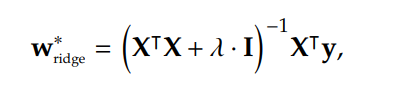

In [ ]:
# linking to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading data set
import pandas as pd
import numpy as np

raw_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/boston.csv', header=None)
data_rows = np.reshape(raw_data.to_numpy(), (506,14))
data = data_rows[:,:13]
target = data_rows[:,13]

# normalizing the data 
data = (data-np.mean(data, axis=0))/np.std(data, axis=0) 

print(data.shape)
print(target.shape)

(506, 13)
(506,)


In [ ]:
# add a constant column of '1' to accomodate the bias 
data_wb = np.hstack((data, np.ones((data.shape[0], 1), dtype=data.dtype)))
print(data_wb.shape)

# choosing alpha on hit and trail basis 
alpha = 0.5 
I = np.identity(data_wb.shape[1])
I[0,0] = 0
penalty1 = alpha*I

# refer to the closed-form solution using ridge regression 
w = np.linalg.inv(data_wb.T @ data_wb + penalty1) @ data_wb.T @ target

# calculate the mean square error in the training set
predict = data_wb @ w 
error = np.sum((predict - target)*(predict - target))/data.shape[0]

print(f'mean square error for the closed-form solution: {error:.3f}')

(506, 14)
mean square error for the closed-form solution: 21.896


### **Ridge Regression on Example 2.1 (regression problem) using using iterative gradient descent method**

In [ ]:
# solve ridge regression using gradient descent 
import numpy as np


class Optimizer():
  def __init__(self, rr, annealing_rate, batch_size, max_epochs):
    self.rr = rr
    self.annealing_rate = annealing_rate
    self.batch_size = batch_size
    self.max_epochs = max_epochs


def ridge_regression_gd(X, y, op):
  n = X.shape[0]   # number of samples
  w = np.zeros(X.shape[1])  # initialization

  rr = op.rr
  errors = np.zeros(op.max_epochs)
  for epoch in range(op.max_epochs):
    indices = np.random.permutation(n)  #randomly shuffle data indices
    for batch_start in range(0, n, op.batch_size):
      X_batch = X[indices[batch_start:batch_start + op.batch_size]]
      y_batch = y[indices[batch_start:batch_start + op.batch_size]]

      # vectorization to compute gradients for a whole mini-batch (see the above formula)
      w_grad = X_batch.T @ X_batch @ w + penalty1 @ w - X_batch.T @ y_batch 

      w -= rr * w_grad / X_batch.shape[0]

    diff = X @ w - y  # prediction difference
    errors[epoch] = np.sum(diff*diff)/n
    rr *= op.annealing_rate

  return w, errors

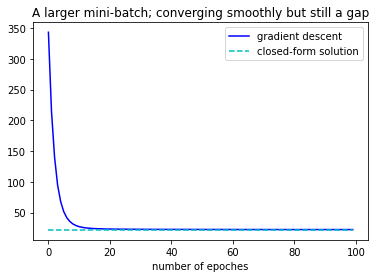

In [ ]:
import matplotlib.pyplot as plt

op = Optimizer(rr=0.01, annealing_rate=0.99, batch_size=20, max_epochs=100)

w, errors = ridge_regression_gd(data_wb, target, op)

plt.title('A larger mini-batch; converging smoothly but still a gap')
plt.xlabel('number of epoches')
plt.plot(errors, 'b', 21.89*np.ones(errors.shape[0]), 'c--')
plt.legend(['gradient descent', 'closed-form solution'])

By using scikit learning, 

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Create ridge regression object
ridge_regr = linear_model.Ridge()

# Train the model using the training set
ridge_regr.fit(data_wb, target)

# Make predictions using the same training set
predict = ridge_regr.predict(data_wb)

# The mean squared error
print("Mean squared error: %.5f" % mean_squared_error(target, predict))

Mean squared error: 21.89586


### **Ridge Regression on Example 2.2 (classification problem) using closed form solution**

In [ ]:
# install idx2numpy

!pip install idx2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7917 sha256=720f4f7666c94e613975d7110cfeac492462c71de1748e344a68b6d307d4c309
  Stored in directory: /root/.cache/pip/wheels/1a/ce/ad/d5e95a35cfe34149aade5e500f2edd535c0566d79e9a8e1d8a
Successfully built idx2numpy


In [ ]:
import idx2numpy
import numpy as np

train_data = idx2numpy.convert_from_file('/content/drive/My Drive/Colab Notebooks/datasets/MNIST/train-images.idx3-ubyte')
train_data = np.reshape(train_data,(60000,28*28))
train_label = idx2numpy.convert_from_file('/content/drive/My Drive/Colab Notebooks/datasets/MNIST/train-labels.idx1-ubyte')
test_data=idx2numpy.convert_from_file('/content/drive/My Drive/Colab Notebooks/datasets/MNIST/t10k-images.idx3-ubyte')
test_data = np.reshape(test_data,(10000,28*28))
test_label = idx2numpy.convert_from_file('/content/drive/My Drive/Colab Notebooks/datasets/MNIST/t10k-labels.idx1-ubyte') 
train_data = np.array(train_data, dtype='float')/255 # norm to [0,1]
train_label = np.array(train_label, dtype='short')
test_data = np.array(test_data, dtype='float')/255 # norm to [0,1]
test_label = np.array(test_label, dtype='short')

#add small random noise to avoid matrix singularity
train_data += np.random.normal(0,0.0001,train_data.shape) 

print(train_data.shape, train_label.shape, test_data.shape, test_label.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [ ]:
# prepare digits '3' and '8' for linear regression

digit_train_index = np.logical_or(train_label == 3, train_label == 8)
X_train = train_data[digit_train_index]
y_train = train_label[digit_train_index]
digit_test_index = np.logical_or(test_label == 3, test_label == 8)
X_test = test_data[digit_test_index]
y_test = test_label[digit_test_index]

# add a constant column of '1' to accomodate the bias (see the margin note on page 107)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1), dtype=X_train.dtype)))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1), dtype=X_test.dtype)))

# convert labels: '3' => -1, '8' => +1
CUTOFF = 5 # any number between '3' and '8'
y_train = np.sign(y_train-CUTOFF)
y_test = np.sign(y_test-CUTOFF)

print(X_train.shape)
print(y_train)

print(X_test.shape)
print(y_test)

(11982, 785)
[-1 -1 -1 ...  1 -1  1]
(1984, 785)
[-1 -1 -1 ... -1  1 -1]


In [ ]:
# use the closed-form solution by ridge regression 

# choosing alpha on hit and trial basis
alpha = 0.1
I = np.identity(X_train.shape[1])
I[0,0] = 0
penalty2 = alpha*I

# refer to the closed-form solution, i.e. Eq.(6.9) on page 112
w = np.linalg.inv(X_train.T @ X_train + penalty2) @ X_train.T @ y_train

# calculate the mean square error and classification accuracy on the training set
predict = X_train @ w 
error = np.sum((predict - y_train)*(predict - y_train))/X_train.shape[0]
print(f'mean square error on training data for the closed-form solution: {error:.5f}')

accuracy = np.count_nonzero(np.equal(np.sign(predict),y_train))/y_train.size*100.0
print(f'classification accuracy on training data for the closed-form solution: {accuracy:.2f}%')

# calculate the mean square error and classification accuracy on the test set
predict = X_test @ w 
error = np.sum((predict - y_test)*(predict - y_test))/X_test.shape[0]
print(f'mean square error on test data for the closed-form solution: {error:.5f}')

accuracy = np.count_nonzero(np.equal(np.sign(predict),y_test))/y_test.size*100.0
print(f'classification accuracy on test data for the closed-form solution: {accuracy:.2f}%')

mean square error on training data for the closed-form solution: 0.19931
classification accuracy on training data for the closed-form solution: 96.85%
mean square error on test data for the closed-form solution: 0.22425
classification accuracy on test data for the closed-form solution: 95.97%


### **Ridge Regression on Example 2.2 (classification problem) using gradient descent method**

In [ ]:
# solve ridge regression using gradient descent 
import numpy as np

class Optimizer():
  def __init__(self, ridge_r, annealing_rate, batch_size, max_epochs):
    self.ridge_r = ridge_r
    self.annealing_rate = annealing_rate
    self.batch_size = batch_size
    self.max_epochs = max_epochs

def ridge_regression_gd2(X, y, X2, y2, op):
  n = X.shape[0]   # number of samples
  w = np.zeros(X.shape[1])  # initialization

  ridge_r = op.ridge_r
  errorsA = np.zeros(op.max_epochs)
  errorsB = np.zeros(op.max_epochs)
  errorsC = np.zeros(op.max_epochs)

  for epoch in range(op.max_epochs):
    indices = np.random.permutation(n)  #randomly shuffle data indices
    for batch_start in range(0, n, op.batch_size):
      X_batch = X[indices[batch_start:batch_start + op.batch_size]]
      y_batch = y[indices[batch_start:batch_start + op.batch_size]]

      # vectorization to compute gradients for a whole mini-batch (see the above formula)
      w_grad = X_batch.T @ X_batch @ w + penalty2 @ w - X_batch.T @ y_batch 

      w -= ridge_r * w_grad / X_batch.shape[0] 

    # for learning curve C
    diff = X @ w - y  # prediction difference
    errorsC[epoch] = np.sum(diff*diff)/n   

    # for learning curve A
    predict = np.sign(X @ w)
    errorsA[epoch] = np.count_nonzero(np.equal(predict,y))/y.size 

    # for learning curve B
    predict2 = np.sign(X2 @ w)
    errorsB[epoch] = np.count_nonzero(np.equal(predict2,y2))/y2.size

    ridge_r *= op.annealing_rate
    print(f'epoch={epoch}: the mean square error is {errorsC[epoch]:.3f} ({errorsA[epoch]:.3f},{errorsB[epoch]:.3f})')

  return w, errorsA, errorsB, errorsC

epoch=0: the mean square error is 0.398 (0.911,0.920)
epoch=1: the mean square error is 0.309 (0.929,0.942)
epoch=2: the mean square error is 0.279 (0.939,0.951)
epoch=3: the mean square error is 0.264 (0.945,0.956)
epoch=4: the mean square error is 0.254 (0.949,0.959)
epoch=5: the mean square error is 0.248 (0.951,0.961)
epoch=6: the mean square error is 0.243 (0.953,0.963)
epoch=7: the mean square error is 0.241 (0.954,0.964)
epoch=8: the mean square error is 0.238 (0.955,0.963)
epoch=9: the mean square error is 0.235 (0.956,0.964)
epoch=10: the mean square error is 0.234 (0.957,0.964)
epoch=11: the mean square error is 0.232 (0.957,0.964)
epoch=12: the mean square error is 0.231 (0.958,0.964)
epoch=13: the mean square error is 0.230 (0.958,0.965)
epoch=14: the mean square error is 0.229 (0.959,0.964)
epoch=15: the mean square error is 0.228 (0.959,0.963)
epoch=16: the mean square error is 0.227 (0.960,0.964)
epoch=17: the mean square error is 0.226 (0.960,0.964)
epoch=18: the mean s

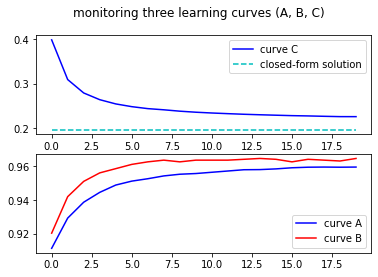

In [ ]:
import matplotlib.pyplot as plt

op = Optimizer(ridge_r=0.001, annealing_rate=0.99, batch_size=50, max_epochs=20)

w, A, B, C = ridge_regression_gd2(X_train, y_train, X_test, y_test, op)

fig, ax = plt.subplots(2)
fig.suptitle('monitoring three learning curves (A, B, C)')
ax[0].plot(C, 'b', 0.196*np.ones(C.shape[0]), 'c--')
ax[0].legend(['curve C', 'closed-form solution'])

ax[1].plot(A, 'b', B, 'r')
ax[1].legend(['curve A', 'curve B'])

In [ ]:
# use ridge regression from sklearn

import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Create linear regression object
l_regr = linear_model.Ridge()

# Train the model using the training set
l_regr.fit(X_train, y_train)

# Make predictions using the same training set
predict = l_regr.predict(X_train)
print("Mean squared error on training data: %.5f" % mean_squared_error(y_train, predict))

# Make predictions using the test set
predict = l_regr.predict(X_test)
print("Mean squared error on test data: %.5f" % mean_squared_error(y_test, predict))

Mean squared error on training data: 0.20013
Mean squared error on test data: 0.22015


### **Problem 2.2:**

Use LASSO to solve the regression problem in Example 2.1 as well as the classification problem in Example 2.2, compare the results of LASSO with those of linear regression and Ridge regression.


### **LASSO Regression on Example 2.1 (regression problem) using closed form solution**

As LASSO is a L1 regularization technique where the model is penalized for the sum of absolute values of the weights and hence a non-differentiable function. So, in general it has no closed-form solution.

###**LASSO regression on Problem 1 using sci-kit learn**

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Create ridge regression object
lasso_regr = linear_model.Lasso()

# Train the model using the training set
lasso_regr.fit(data_wb, target)

# Make predictions using the same training set
predict = lasso_regr.predict(data_wb)

# The mean squared error
print("Mean squared error: %.5f" % mean_squared_error(target, predict))

Mean squared error: 28.46465


### **LASSO Regression on Problem 2 using sci-kit learn**

In [ ]:
# use LASSO regression from sklearn

import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Create linear regression object
l_regr = linear_model.Lasso()

# Train the model using the training set
l_regr.fit(X_train, y_train)

# Make predictions using the same training set
predict = l_regr.predict(X_train)
print("Mean squared error on training data: %.5f" % mean_squared_error(y_train, predict))

# Make predictions using the test set
predict = l_regr.predict(X_test)
print("Mean squared error on test data: %.5f" % mean_squared_error(y_test, predict))

Mean squared error on training data: 0.99945
Mean squared error on test data: 0.99970


### **Conclusion**
Linear regression is the most basic form, where the model is not penalized for its choice of weights, at all. That means, during the training stage, if the model feels like one particular feature is particularly important, the model may place a large weight to the feature. This sometimes leads to overfitting in small datasets.

Lasso is a modification of linear regression, where the model is penalized for the sum of absolute values of the weights. Thus, the absolute values of weight will be (in general) reduced, and many will tend to be zeros. During training, the objective function become.

Ridge takes a step further and penalizes the model for the sum of squared value of the weights. Thus, the weights not only tend to have smaller absolute values, but also really tend to penalize the extremes of the weights, resulting in a group of weights that are more evenly distributed. 